# Deep Learning Practical Assignment #2
# Linear Classifier : Fully Connected Networks

# Installing libraries :


---




In [ ]:
!pip install keras==2.7.0
!pip install tensorflow==2.7.0
!pip install numpy==1.19.5
!pip install scikit-learn==1.0.1
!pip install matplotlib==3.2.2

# Importing necessary dependencies

---



In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Experiment 1:
# Toy Dataset : 
We start by generating the dataset :

In [ ]:
def generateDataSet(sigma1, sigma2) :

  # mu1 and mu2 initialization   
  mu1 = [-1, 0]
  mu2 = [1, 0]
  x = np.zeros((250,2))
  
  #Generating the labels
  y=[-1 if i<126 else 1 for i in range(250)]
  y = np.array(y)

  # Generating the Gaussian distribution of the first 125 examples 
  for i in range(125) : 
    x[i]=np.random.normal(mu1, sigma1, (1,2))

  # Generating the Gaussian distribution of the last 125 examples
  for i in range(125, 250) :
    x[i]=np.random.normal(mu2, sigma2, (1,2))

  #Shuffuling the examples and the labels
  x,y=shuffle(x,y)

  return x,y

In [ ]:
X,Y=generateDataSet(0.25,0.25)
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Converting labels vector to binary class matrix
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

# Using Keras

In [ ]:
# Sample code to create a fully connected network
model = Sequential()
model.add(Dense(12 , input_dim =2 , activation = 'relu'))
model.add(Dense (5 , activation ='relu'))
model.add(Dense (3 , activation ='relu'))
model.add(Dense (2 , activation ='sigmoid'))

# compile the keras model
model.compile( loss ='binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

# fit the keras model on the dataset
model.fit (X_train , Y_train , epochs =20 , batch_size =10, verbose=0)

In [ ]:
#Evaluating the model and its accuracy
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.0268 - accuracy: 1.0000


[0.026847124099731445, 1.0]

# Experiment 2 :
# IRIS Dataset : 
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
# We start by loading the dataset and preprocessing it

In [ ]:
#loading the dataset
irisData = load_iris()

#the dataset's description 
print('iris\'s features : ',irisData.feature_names )
print ('iris\'s targets :', irisData.target_names)

#displaying some examples of the dataset
print('the 10th example of the dataset :',irisData.data[9], 'its label is :', irisData.target[9], 'it\'s an iris setosa')
print('the 60th example of the dataset :',irisData.data[59], 'its label is :', irisData.target[59], 'it\'s an iris virginica')
print('the 150th example of the dataset :',irisData.data[149], 'its label is :', irisData.target[149], 'it\'s an iris versicolor')

#loading the data and the labels
X=irisData.data
Y=irisData.target

#Converting targets to binary class matrix
Y=to_categorical(Y)

#Splitting the dataset in training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

iris's features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris's targets : ['setosa' 'versicolor' 'virginica']
the 10th example of the dataset : [4.9 3.1 1.5 0.1] its label is : 0 it's an iris setosa
the 60th example of the dataset : [5.2 2.7 3.9 1.4] its label is : 1 it's an iris virginica
the 150th example of the dataset : [5.9 3.  5.1 1.8] its label is : 2 it's an iris versicolor


# We define the function that builds a model

In [ ]:
def buildModel(inputSize, outputSize, nbLayers, nbNeurones, activationList, lr, loss) :

  #Build the model layer by layer
  model = Sequential()
  model.add(Dense(nbNeurones[0] , input_dim =inputSize , activation = activationList[0]))
  for i in range(1,(nbLayers-1)):
    model.add(Dense(nbNeurones[i], activation = activationList[i]))
  model.add(Dense(outputSize ,activation = activationList[-1]))

  #Compile the model
  model.compile(loss=loss, optimizer=Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.Precision(), 
                               tf.keras.metrics.Recall()]) 

  #returning the model
  return (model)

# 1st experience :


*   number of layers : 2
*   number of neurones : 4, 3
*   activation functions : relu, sigmoid
*   learning rate : 0.001
*   loss function : Categorical crossentropy







In [ ]:
model1=buildModel(X_train.shape[1],Y_train.shape[1],2,[4, 3],['relu','sigmoid'],0.001,'categorical_crossentropy')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the model
history1=model1.fit(X_train, Y_train, epochs=50, batch_size=5, verbose=0)

In [ ]:
score1 = model1.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format('Model','Loss','Accuracy','Precision','Recall'))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°1',score1[0], score1[1], score1[2], score1[3]))

Model      Loss                      Accuracy             Precision            Recall              
n°1        0.5369065403938293        0.699999988079071    0.4285714328289032   1.0                 


# 2nd Experience :
We increase the number of layers the number of neurons:


*   number of layers : 3
*   number of neurones : 4, 7, 3
*   activation functions : relu, relu, sigmoid
*   learning rate : 0.001
*   loss function : Categorical crossentropy




In [ ]:
model2=buildModel(X_train.shape[1],Y_train.shape[1],3,[4, 7, 3],['relu','relu','sigmoid'],0.001,'categorical_crossentropy')

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 7)                 35        
                                                                 
 dense_8 (Dense)             (None, 3)                 24        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the model
history2=model2.fit(X_train, Y_train, epochs=50, batch_size=5, verbose=0)

In [ ]:
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format('Model','Loss','Accuracy','Precision','Recall'))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°2',score2[0], score2[1], score2[2], score2[3]))

Model      Loss                      Accuracy             Precision            Recall              
n°2        0.3640442192554474        0.9666666388511658   0.4285714328289032   1.0                 


# 3rd Experiment :
*   number of layers : 4
*   number of neurones : 4, 15, 7, 3
*   activation functions : relu, relu, relu, sigmoid
*   learning rate : 0.001
*   loss function : Categorical crossentropy


In [ ]:
model3=buildModel(X_train.shape[1],Y_train.shape[1],4,[4, 15, 7, 3],['relu','relu','relu','sigmoid'],0.001,'categorical_crossentropy')

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 15)                75        
                                                                 
 dense_11 (Dense)            (None, 7)                 112       
                                                                 
 dense_12 (Dense)            (None, 3)                 24        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the model
history3=model3.fit(X_train, Y_train, epochs=50, batch_size=5, verbose=0)

In [ ]:
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format('Model','Loss','Accuracy','Precision','Recall'))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°3',score3[0], score3[1], score3[2], score3[3]))

Model      Loss                      Accuracy             Precision            Recall              
n°3        0.4025392234325409        0.800000011920929    0.6000000238418579   1.0                 


# To recapitulate :

In [ ]:
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format('Model','Loss','Accuracy','Precision','Recall'))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°1',score1[0], score1[1], score1[2], score1[3]))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°2',score2[0], score2[1], score2[2], score2[3]))
print ("{:<10} {:<25} {:<20} {:<20} {:<20}".format( 'n°3',score3[0], score3[1], score3[2], score3[3]))

Model      Loss                      Accuracy             Precision            Recall              
n°1        0.5369065403938293        0.699999988079071    0.4285714328289032   1.0                 
n°2        0.3640442192554474        0.9666666388511658   0.4285714328289032   1.0                 
n°3        0.4025392234325409        0.800000011920929    0.6000000238418579   1.0                 


# Conclusion :
The 2nd model gave the best results.
It is composed of three layers, the first layer with 4 neurons and relu as an activation function, the second layer contains 7 neurons and has relu as an activation function and the last one containes 3 neurons and has sigmoid as an activation function. We used Adam as an optimizer with a learning rate equal to 0.01 and the categorical crossentropy as a loss function.
This architecture gave us 96% accuracy, 43% precision, 100% recall and 36% loss. To conclude, for each case we should find the combination of hyper-parameters that gives the most accurate and best results.

---



# Working towards the CNN :
The digits dataset is a dataset of handwritten digits and each feature is the intensity of one pixel of an 8 x 8 image. This dataset is made up of 1797 8 x 8 images. Each image is of a hand-written digit. In order to utilize an 8 x 8 figure like this, we’d have to first transform it into a feature vector with length 64.

In [ ]:
#Loading the digit dataset
digits = load_digits()

#loading the data and the labels
X = digits.images.reshape((len(digits.images), -1))
Y = digits.target 

A vector is presented with the observation feature values. We are able to visualize the handwritten character by using the images method and load the feature values as a matrix.

the first observation's data is : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
its label is 0
its visualization is as follow :


<Figure size 432x288 with 0 Axes>

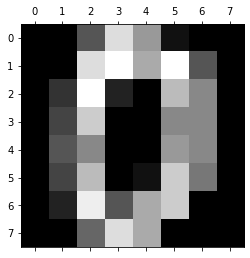

In [ ]:
print('the first observation\'s data is :', X[0])
print('its label is',Y[0])
print('its visualization is as follow :')
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [ ]:
Y=to_categorical(Y)
print(Y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Splitting the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# 1st experience
using :


*   Number of layers : 2
*   Number of neurons : 64, 10
*   activation functions : relu, sigmoid
*   learning rate : 0.001
*   loss function : Categorical crossentropy



In [ ]:
model1=buildModel(X_train.shape[1],Y_train.shape[1],2,[64,10],['tanh','sigmoid'],0.001,'categorical_crossentropy')

In [ ]:
# Train the model
model1.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=0)

In [ ]:
score1 = model1.evaluate(X_test, Y_test, verbose=0)
print ("{:<25} {:<20}".format('Loss','Accuracy'))
print ("{:<25} {:<20}".format(score1[0], score1[1]))

Loss                      Accuracy            
0.054593849927186966      0.9833333492279053  


# 2nd experience :
we use : 
*   Number of layers : 3
*   Number of neurons : 64, 15, 10
*   activation functions : relu, tanh, softmax
*   learning rate : 0.001
*   loss function : Categorical crossentropy

In [ ]:
model2=buildModel(X_train.shape[1],Y_train.shape[1],3,[64, 15, 10],['relu', 'tanh','softmax'],0.001,'categorical_crossentropy')

In [ ]:
# Train the model
model2.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=0)

In [ ]:
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print ("{:<25} {:<20}".format('Loss','Accuracy'))
print ("{:<25} {:<20}".format(score2[0], score2[1]))

Loss                      Accuracy            
0.09610755741596222       0.980555534362793   


# 3rd experience :
using :
*   Number of layers : 4
*   Number of neurons : 64, 32, 16, 10
*   activation functions : relu, sigmoid, sigmoid, softmax
*   learning rate : 0.001
*   loss function : Categorical crossentropy

In [ ]:
model3=buildModel(X_train.shape[1],Y_train.shape[1],4,[64, 32, 16, 10],['relu', 'sigmoid', 'sigmoid','softmax'],0.001,'categorical_crossentropy')

In [ ]:
# Train the model
model3.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=0)

In [ ]:
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print ("{:<25} {:<20}".format('Loss','Accuracy'))
print ("{:<25} {:<20}".format(score3[0], score3[1]))

Loss                      Accuracy            
0.08513306826353073       0.980555534362793   


# To recapitulate :

In [ ]:
print ("{:<20} {:<25} {:<20}".format('Model','Loss','Accuracy'))
print ("{:<20} {:<25} {:<20}".format('n°1', score1[0], score1[1]))
print ("{:<20} {:<25} {:<20}".format('n°2', score2[0], score2[1]))
print ("{:<20} {:<25} {:<20}".format('n°3', score3[0], score3[1]))

Model                Loss                      Accuracy            
n°1                  0.054593849927186966      0.9833333492279053  
n°2                  0.09610755741596222       0.980555534362793   
n°3                  0.08513306826353073       0.980555534362793   


# Conclusion 
The 1st model, with just two layers, one for input with 64 neurons and tanh as an activation function and one for output with 10 neurons and softmax as an activation function, with a learning rate equal to 0.01 and categorical crossentropy as loss function gave the best results. With an accuracy of 98,3% and loss of 5%.
So in this case, increasing the number of layers and neurons doesn't help in improving the results.

---



# Face dataset :
**The olivetti faces dataset** contains a set of face images. There are ten different images of each of 40 distinct subjects. The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1]. The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

In [ ]:
#Loading the dataset
olivetti = fetch_olivetti_faces()

In [75]:
#Defining data and labels
faces = olivetti.images
target = olivetti.target

In [ ]:
print("There are {} images in the dataset".format(len(faces)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(faces[1].shape[0],faces[1].shape[1]))
print("unique target number:",np.unique(target))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


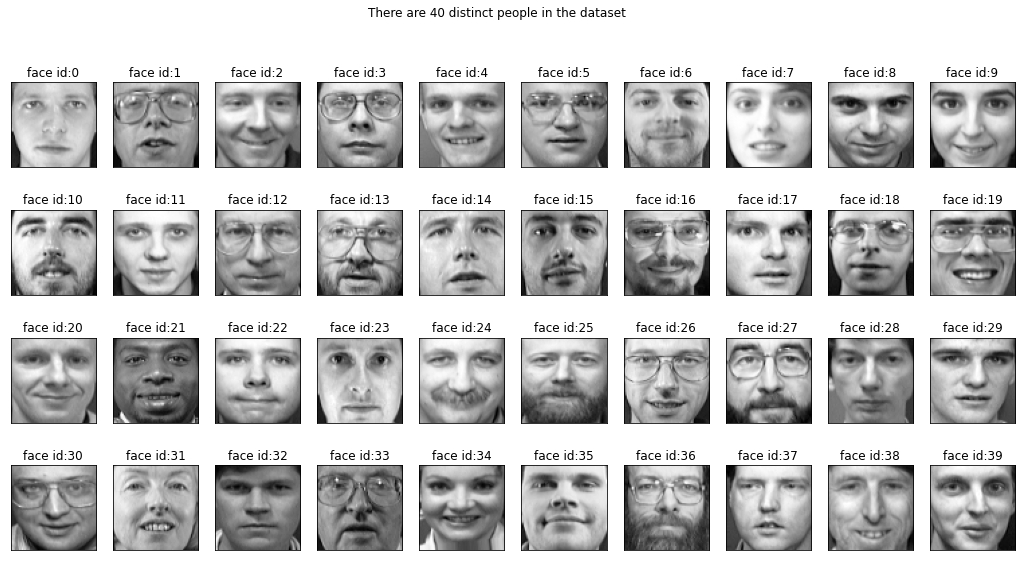

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(faces, np.unique(target))

In [ ]:
#reshaping data and targets so it fits the NN
faces = faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
target = to_categorical(target)

In [ ]:
#Splitting the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(faces, target, test_size=0.2, stratify=target, random_state=0) 

In [ ]:
#building a neural network to recognize faces
modelF=buildModel(X_train.shape[1],Y_train.shape[1],4,[256, 128, 64, 40],['relu','relu','tanh','softmax'],0.001,'categorical_crossentropy')

In [ ]:
modelF.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               1048832   
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 40)                2600      
                                                                 
Total params: 1,092,584
Trainable params: 1,092,584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelF.fit(X_train, Y_train, batch_size=20, epochs=80, verbose=0)

In [ ]:
scoreF = modelF.evaluate(X_test, Y_test, verbose=0)
print ("{:<25} {:<20}".format('Loss','Accuracy'))
print ("{:<25} {:<20}".format(scoreF[0], scoreF[1]))

Loss                      Accuracy            
3.690305233001709         0.02500000037252903 


This architecture doesn't work well, so we introduce a change in the optimizer and we try rmsprop instead of Adam and we try to train longer

In [ ]:
#Build the model layer by layer
model = Sequential()
model.add(Dense(256, input_dim =4096 , activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(40, activation = 'softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               1048832   
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 40)                5160      
                                                                 
Total params: 1,086,888
Trainable params: 1,086,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model
score=model.fit(X_train, Y_train, epochs=120, batch_size=20, verbose=0)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print ("{:<25} {:<20}".format('Loss','Accuracy'))
print ("{:<25} {:<20}".format(score[0], score[1]))

Loss                      Accuracy            
1.3165005445480347        0.625               


# Conclusion 
The architecture consisted of 3 layers, the first with 256 neurons and relu as an activation function, the second with 128 neurons and relu as an activation function and the last one with 40 neurons and softmax as an activation function. We used rmsprop as an optimizer and used categorical crossentropy for the loss function. Finally we trained the model for 120 epochs. That gave us a model with an accuracy of 62% and loss equal to 131% .
We conclude that when it comes to features detection and image treatement, fully connected networks don't give very good results. That's why we would rather use CNN, Convolutional Neural Networks, for that task.